In [2]:
import requests
from IPython.core.display import HTML

# Principal Component Analysis (PCA)
In this in-class exercise you will be guided through the steps necessary for implementing a PCA on a sequence of human poses. You will work with the poses data, which was used for the exercises in week 2
. The dataset has a shape of $(1403, 100, 25*2)$. This means that there are 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is an x and y coordinate ($25*2$). For this exercise, you will use a single pose sequence of 100 frames and apply dimension reduction to the selected sequence. 
The following cells loads the libraries, the dataset and provides functions for plotting the poses:


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pca_utils import *

# Suppress the specific warning
warnings.filterwarnings("ignore")

## 1. Data inspection
The cell below:
1. Loads the data and constructs the data matrix.
2. Reshapes the data into a $100x50$ data-matrix where each row contains a flattened vector of a pose.
3. Selects the first 40 frames from a single pose sequence and plot it.


---
**Task 1 (easy): Loading and inspecting the data👩‍💻**
1. Run the code cell below.
2. Change the code to display the sequences 4,5,7 and visually observe how these sequences vary. 


---

(1403, 100, 25, 2)
(1403, 100, 50)


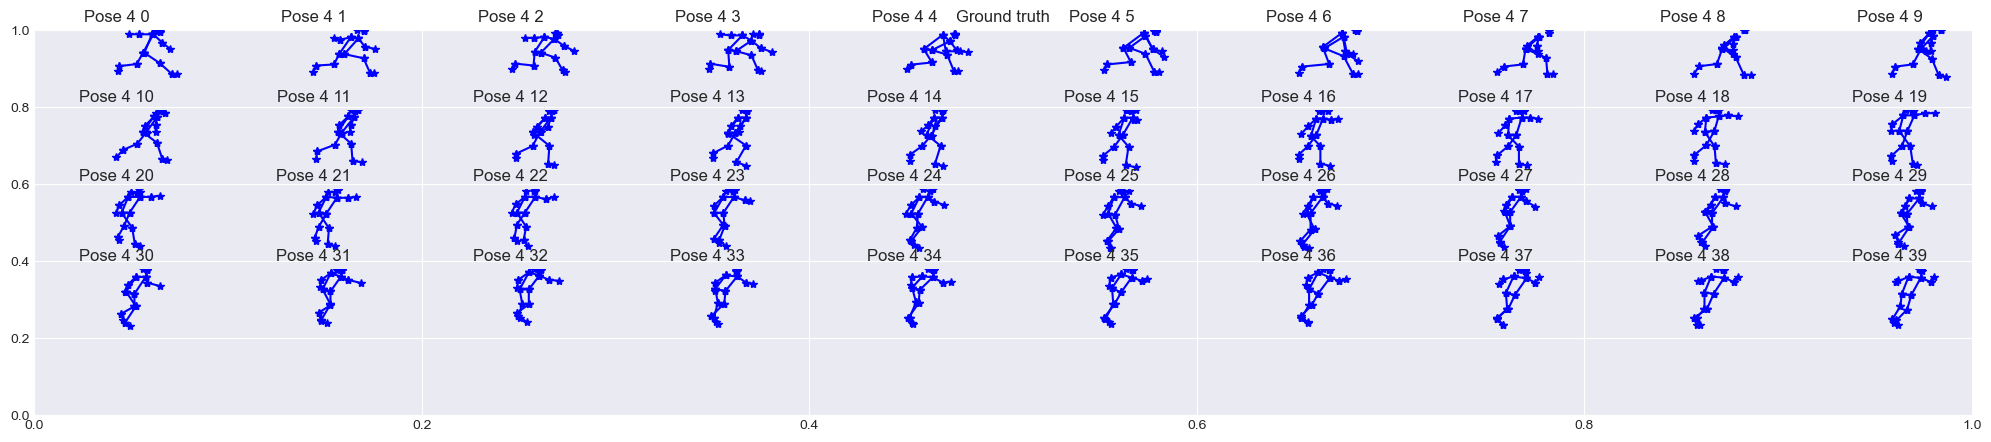

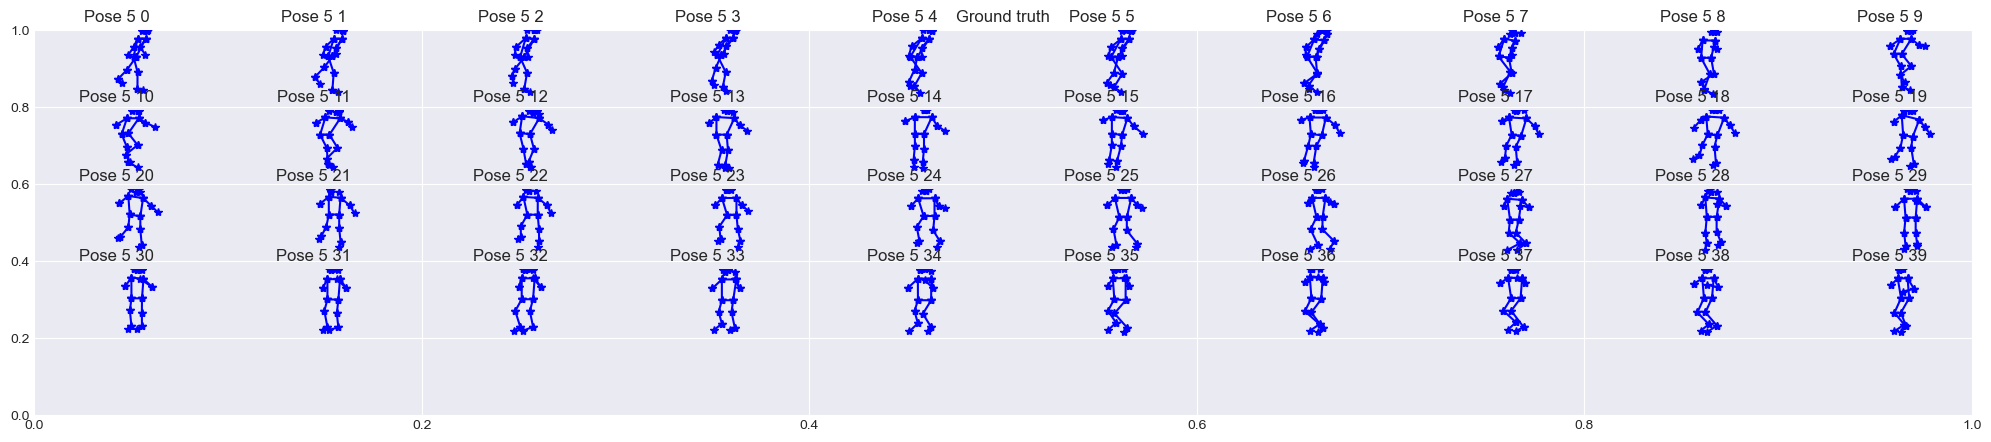

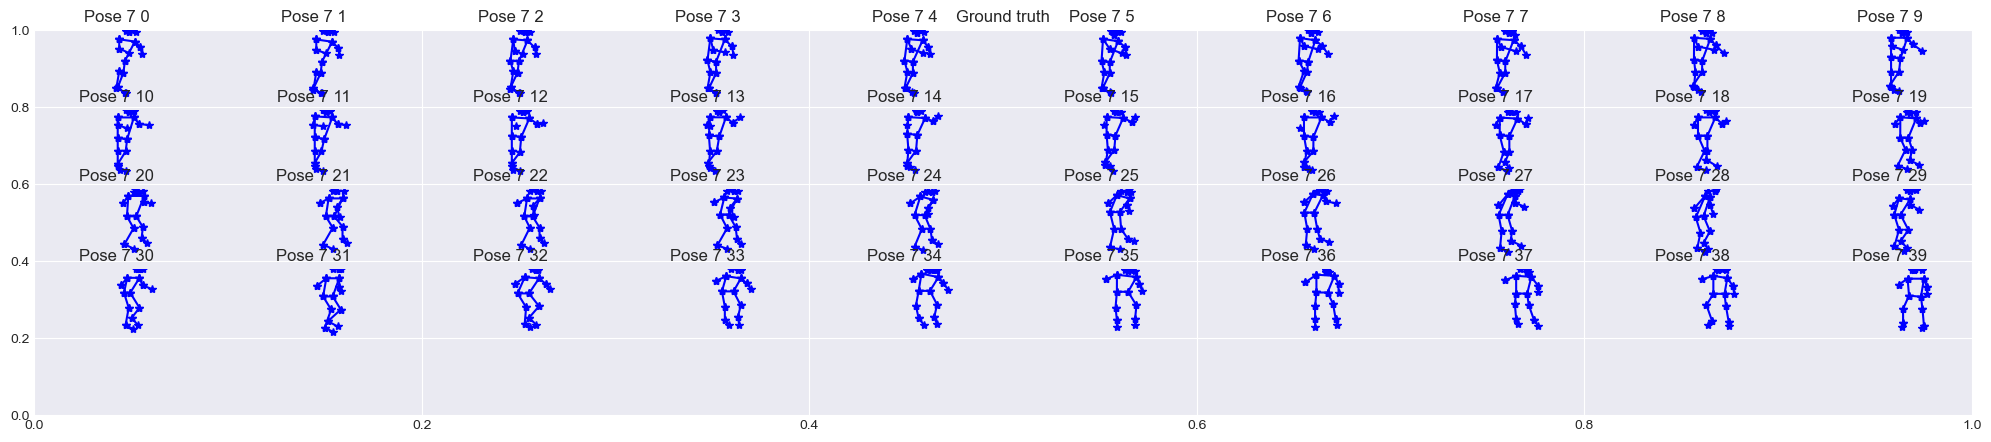

In [4]:
data = np.load('poses_norm.npy')
print(data.shape)
N_Pose_Sequences, T_Frames, D_Coord_Pairs, C_Num_Coords = data.shape
reshaped_data = data.reshape(N_Pose_Sequences, T_Frames, D_Coord_Pairs * C_Num_Coords)
print(reshaped_data.shape)

# Define the new desired shape (40, 50)
nr_of_frames = 40
new_shape = (nr_of_frames, 50)

# List of sequences to display
sequences_to_display = [4, 5, 7]

for seq in sequences_to_display:
    # Select the specific sequence
    dataset = reshaped_data[seq]
    
    # Reshape the array to the new shape
    reshaped_data2 = np.empty(new_shape)
    reshaped_data2[:] = dataset[:new_shape[0], :]
    
    # Plot the sequence
    plot_single_sequence(reshaped_data2, pose_name=f'Pose {seq}', color='blue')


## 2. Covariance matrix
In the following tasks you will construct and inspect the covariance matrix for a given pose sequence. 

---
**Task 2 (easy): Covariance matrix - NumPy method👩‍💻**
1. Run the cell below to obtain and plot the covariance matrix. 
2. What does the heatmap tell us about the relationship between the variables (skeletal joint coordinates)? 


---

<Axes: >

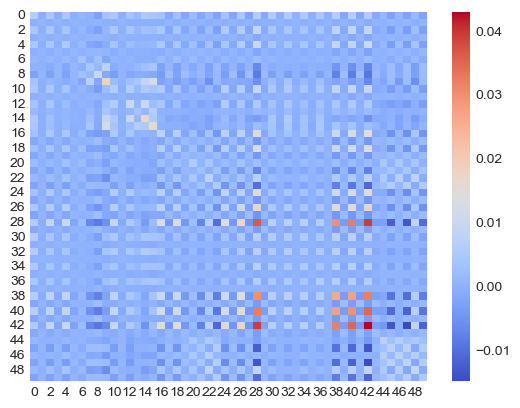

In [5]:
# Calculate the covariance matrix for the entire dataset
cov_matrix = np.cov(dataset, rowvar=False)
# Plotting
sns.heatmap(cov_matrix, cmap='coolwarm')

Currently, the dataset is organized by frames, with each frame having alternating x and y coordinates in the order:  $[x_1, y_1, x_2, y_2, \dots, x_{25}, y_{25}]$. The cell below rearranges the data for illustrative purposes, grouping all x-coordinates first, followed by all y-coordinates: $[x_1, x_2, \dots, x_{25}, y_1, y_2, \dots, y_{25}]$.


In [6]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = dataset.shape

# Separate even and odd columns
even_indexes = np.arange(0, num_columns, 2)  # Even indexes (0, 2, 4, ...)
odd_indexes = np.arange(1, num_columns, 2)   # Odd indexes (1, 3, 5, ...)

# Rearrange the dataset
rearranged_dataset = dataset[:, np.concatenate((even_indexes, odd_indexes))]


---
**Task 3 (easy): Covariance matrix - rearranged data👩‍💻**
1. Run the cell below to obtain and plot the covariance matrix of the rearranged data. 


---

<Axes: >

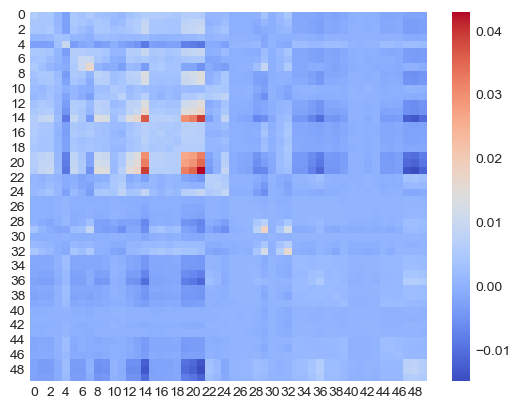

In [7]:
cov_matrix = np.cov(rearranged_dataset, rowvar=False)
sns.heatmap(cov_matrix, cmap='coolwarm')

## Task 3 reflection

Hvert "led" er en (x,y) koordinat.
Tænk på når man bevæger armen. Så er ledt på albuen (x,y), korreleret med ledet på armen (x,y).
Såsom knæ er korreleret med fod.
Hvis to variable afhænger meget af hinanden (høj covariance) så kan man lave dimentionallity reduction, fordi den ene kan udledes hvis man kender den anden.


---
**Task 4 (medium): Implement your own covariance matrix _(optional)_👩‍💻**
The following task should only be completed if you have extra time and want to try constructing the covariance matrix yourself. Use the `rearranged_dataset`
 to:
1. Construct the covariance matrix $\mathbf{C}$:


$$

\mathbf{C} = \frac{1}{N} \sum_{i=1}^{N} (\mathbf{x}_i - \boldsymbol{\bar{x}})(\mathbf{x}_i - \boldsymbol{\bar{x}})^\top

$$
where $\mathbf{x}_i$ represents the $i$-th coordinate in the dataset and $\boldsymbol{\bar{x}}$ is the mean vector obtained by averaging the coordinates for each joint $\boldsymbol{\bar{x}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i$

**Hint**
To center the data first calculate the mean vector, then subtract it from each data point of the pose sequence.

2. Create a heatmap of the covariance matrix.
3. Compare the covariance matrix obtained in this task to the one obtained in the previous task. How and why are they similar/different?


---

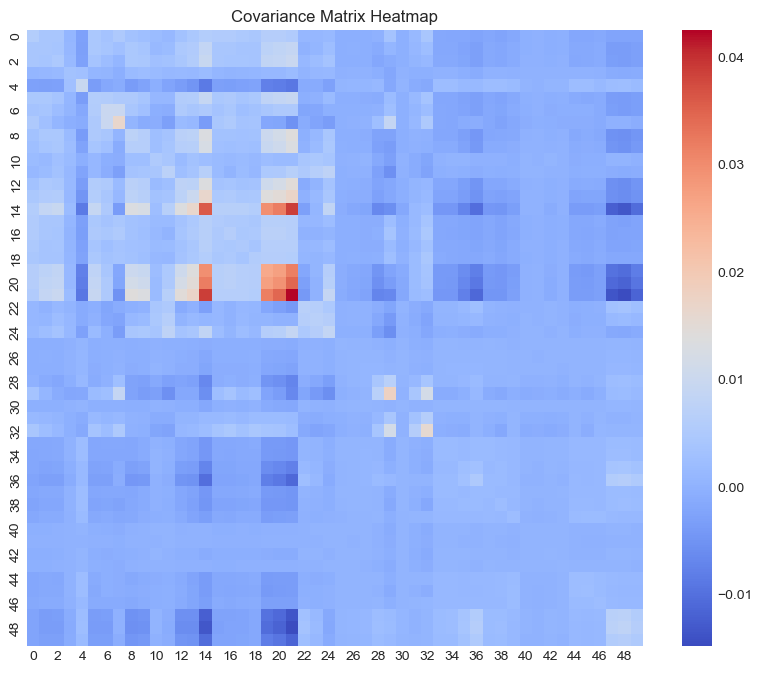

'\nExplanation of the Comparison Task\nCompare the covariance matrix generated here with the one obtained through np.cov or another automated method by:\n\nChecking if the values differ significantly.\nConsidering whether differences are due to normalization by \nN instead of  N-1, which is a common adjustment in np.cov.\n'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `rearranged_dataset` is available as your data matrix of shape (N, 50)
N_Pose_Sequences, D_Coord_Pairs = rearranged_dataset.shape

# Step 1: Calculate the mean vector
mean_vector = np.mean(rearranged_dataset, axis=0)

# Step 2: Center the data by subtracting the mean vector
centered_data = rearranged_dataset - mean_vector

# Step 3: Calculate the covariance matrix
cov_matrix = (centered_data.T @ centered_data) / N_Pose_Sequences

# Step 4: Plot the covariance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Covariance Matrix Heatmap")
plt.show()

'''
Explanation of the Comparison Task
Compare the covariance matrix generated here with the one obtained through np.cov or another automated method by:

Checking if the values differ significantly.
Considering whether differences are due to normalization by 
N instead of  N-1, which is a common adjustment in np.cov.
'''


---
**Task 5 (easy): Reflection _(optional)_💡**
1. How would you change the above pipeline for obtaining the covariance matrix for all of the 1403 pose sequences? 


---
**Task 6 (easy): Eigen decomposition👩‍💻**
1. Run the cell below to find the eigenvalues and eigenvectors of the covariance matrix.
2. Plot the eigenvalues as in the plot below.


---

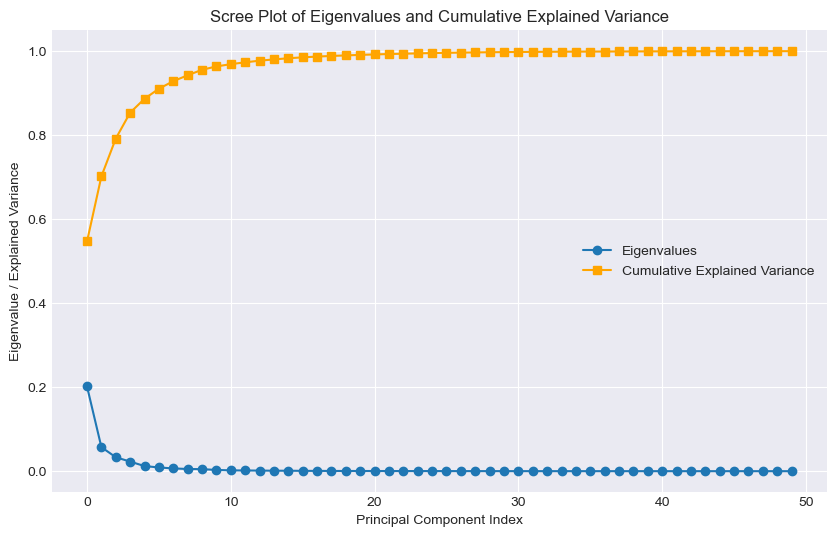

In [9]:
#Task 5

# Load and reshape the data
data = np.load('poses_norm.npy')
N_Pose_Sequences, T_Frames, D_Coord_Pairs, C_Num_Coords = data.shape

# Step 1: Flatten each pose sequence to obtain a shape (N, T * D * C)
reshaped_data_all = data.reshape(N_Pose_Sequences, T_Frames * D_Coord_Pairs * C_Num_Coords)

# Step 2: Calculate the mean vector across all sequences
mean_vector_all = np.mean(reshaped_data_all, axis=0)

# Step 3: Center the data by subtracting the mean vector from each sequence
centered_data_all = reshaped_data_all - mean_vector_all

# Step 4: Compute the covariance matrix
cov_matrix_all = (centered_data_all.T @ centered_data_all) / N_Pose_Sequences

# Now `cov_matrix_all` is the covariance matrix for all 1403 pose sequences.

# Task 6
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(eigenvalues_sorted) / np.sum(eigenvalues_sorted)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues_sorted, marker='o', label='Eigenvalues')
plt.plot(cumulative_explained_variance, marker='s', color='orange', label='Cumulative Explained Variance')
plt.title("Scree Plot of Eigenvalues and Cumulative Explained Variance")
plt.xlabel("Principal Component Index")
plt.ylabel("Eigenvalue / Explained Variance")
plt.legend()
plt.show()


---
**Task 7 (easy): Properties of eigenvalues and eigenvectors👩‍💻**
1. Determine whether all of the eigenvalues are non-negative (greater than or equal to 0)
2. Verify that the obtained eigenvectors are orthogonal. An efficient way is to use the definition of an orthonormal matrix ($A^ \top A=I$). Alternatively, you can verify them individually.


**Hint**
Notice that the values may be slightly imprecise due to the finite precision of numerical representations. You can use `np.isclose`
 to check whether two values are close to each other or not.

3. What is the total variance of the dataset? 


**Hint**
The sum of all eigenvalues should equal the total variance in the original data, however due to numerical imprecision you might get slightly different values.


---

In [10]:

# Step 1: Check if all eigenvalues are non-negative
'''

Check if Eigenvalues are Non-Negative
Since the covariance matrix is symmetric and positive semi-definite, all eigenvalues should theoretically be non-negative. We can use np.all to confirm this.
'''
non_negative_eigenvalues = np.all(eigenvalues >= 0)
print(f"All eigenvalues are non-negative: {non_negative_eigenvalues}")

# Step 2: Verify orthogonality of eigenvectors. Which is checking A^T @ A = I
# Create a matrix of eigenvectors
eigenvectors_matrix = np.array(eigenvectors)
# Check if eigenvectors_matrix.T @ eigenvectors_matrix is close to the identity matrix
identity_check = np.allclose(eigenvectors_matrix.T @ eigenvectors_matrix, np.identity(eigenvectors_matrix.shape[0]))
print(f"Eigenvectors are orthogonal: {identity_check}")

# Step 3: Calculate total variance.  The sum of eigenvalues represents the total variance in the dataset. This value is useful for understanding how much variance can be explained by each principal component
total_variance = np.sum(eigenvalues)
print(f"Total variance of the dataset: {total_variance}")


All eigenvalues are non-negative: True
Eigenvectors are orthogonal: True
Total variance of the dataset: 0.36879332034049883



---
**Task 8 (easy): Sorting Eigenvalues and Eigenvectors👩‍💻**
1. Use [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
 to get the list of permutation indices of the eigenvalues in descending order, then sort them. 
2. Use the list of indices to sort the eigenvectors based on the eigenvalues. 
3. Plot the sorted eigenvalues. The plot should have a similar shape as the figure below.


---

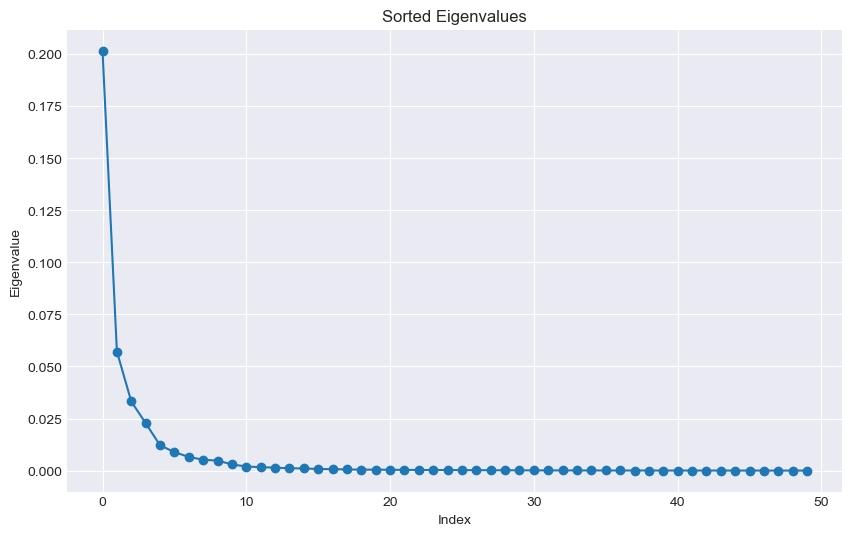

In [11]:
# Step 1: Sort eigenvalues in descending order
# Get indices that would sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Step 2: Sort eigenvalues and eigenvectors based on these indices
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 3: Plot the sorted eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, marker='o')
plt.title("Sorted Eigenvalues")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.show()



**Info**
We can chose to retain a certain percentage of the total variation by selecting the number of principal components where the sum of the eigenvalues correspond to the desired variance. It is convenient to calculate the acummulative sum of the eigenvalues (sum of the variances) to easily determine the number of components needed for retaining a certain percentage of the total variance. This can be achieved using the [`cumsum`
](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
 function. 


---
**Task 9 (easy): Retain variance👩‍💻**
Run the cell below to calculate the normalized cumulative explained variance.
1. Plot the cumulative variance as in the figure below.
2. How many components are needed to retain: $50$%, $80$%, $90$%, $95$% of the variation
3. For the following tasks, select $k$ such that $95$% of the variation is retained.


---

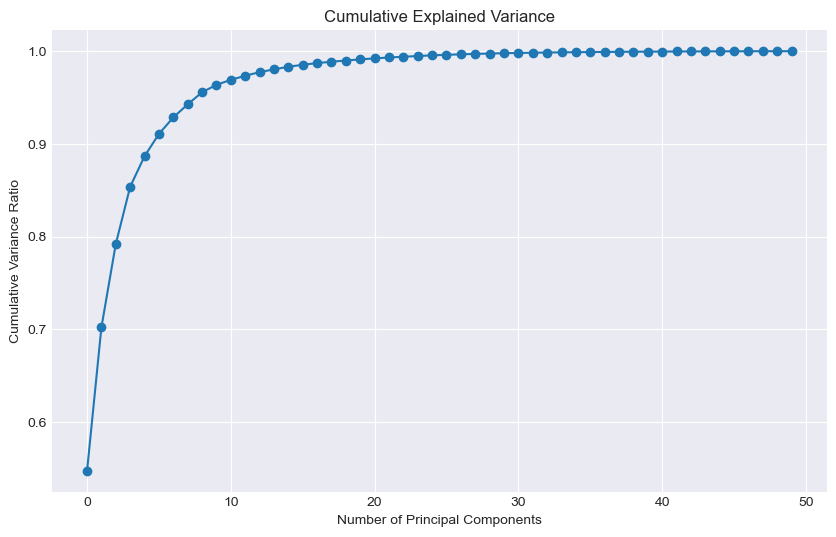

Number of components needed to retain:
50% of variance: 1
80% of variance: 4
90% of variance: 6
95% of variance: 9
Selected k for 95% variance retention: 9


In [12]:
# Step 1: Calculate cumulative variance ratio
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Step 2: Plot the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)
plt.show()

# Step 3: Determine the number of components needed for 50%, 80%, 90%, and 95% variance retention
variance_thresholds = [0.50, 0.80, 0.90, 0.95]
components_needed = [np.argmax(cumulative_variance_ratio >= threshold) + 1 for threshold in variance_thresholds]

print("Number of components needed to retain:")
print(f"50% of variance: {components_needed[0]}")
print(f"80% of variance: {components_needed[1]}")
print(f"90% of variance: {components_needed[2]}")
print(f"95% of variance: {components_needed[3]}")

# For the following tasks, we will use k for 95% variance
k = components_needed[3]
print(f"Selected k for 95% variance retention: {k}")


# PCA - In-class week 2
## 4. Mixing parameters
The following section describes how much each variable contributes to the selected principal components:

---
**Task 10 (medium): Mixing parameters👩‍💻**
1. Change the cell below to construct the orthonormal $\Phi$ matrix containing the first $k = 9$ eigenvectors, where:


$$
{\Phi} = 
\begin{bmatrix}
    | & | & \cdots & | \\
    \Phi_1 & \Phi_2 & \cdots & \Phi_9 \\
    | & | & \cdots & |
\end{bmatrix}
$$
2. Define the mixing parameters $m_i = \sqrt{\lambda_i} \Phi_{i} $, where $\Phi_{i}$ represents the $i$-th column of $\Phi$ (the selected eigenvectors) and $\lambda_i$ represents the corresponding eigenvalue. 


---

In [13]:
# Select k = 9 eigenvectors
k = 9
Phi = sorted_eigenvectors[:, :k]  # Select the first 9 eigenvectors as columns

# Calculate mixing parameters
mixing_params = np.zeros_like(Phi)  # Initialize an array for the mixing parameters

for i in range(k):
    mixing_params[:, i] = np.sqrt(sorted_eigenvalues[i]) * Phi[:, i]

# Display the shape of the mixing parameters matrix
print("Shape of mixing parameters:", mixing_params.shape)


Shape of mixing parameters: (50, 9)



---
**Task 11 (medium): Plot the mixing parameters💡**
1. Run the cell below to plot the contribution of each variable to the principal components. 
2. Use the plot to describe how each of the principal components make use of the different variables of the pose coordinates in the original data. 
3. What do positive and negative values in the principal components indicate, and how do they relate to the original data?


---

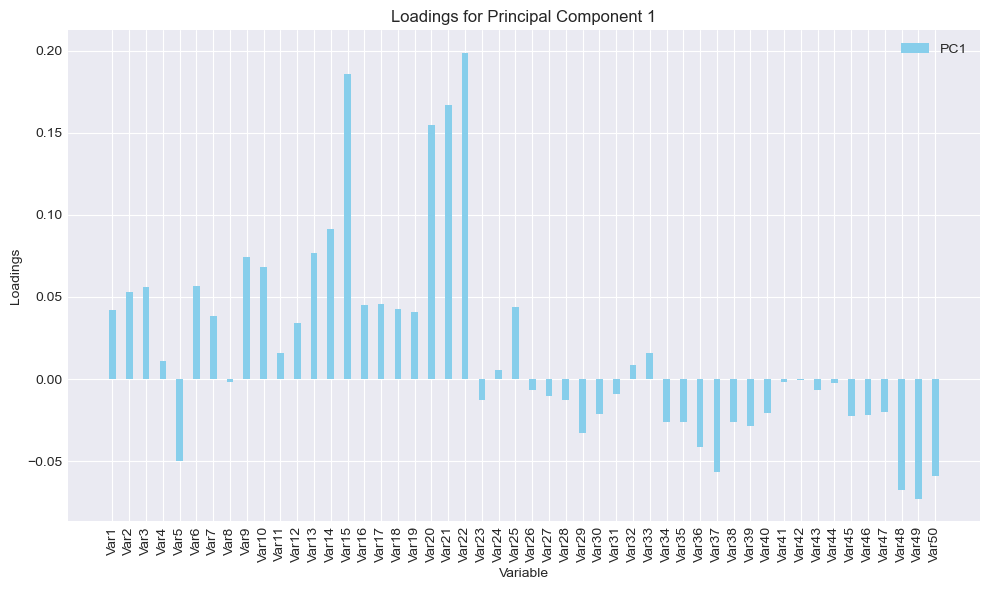

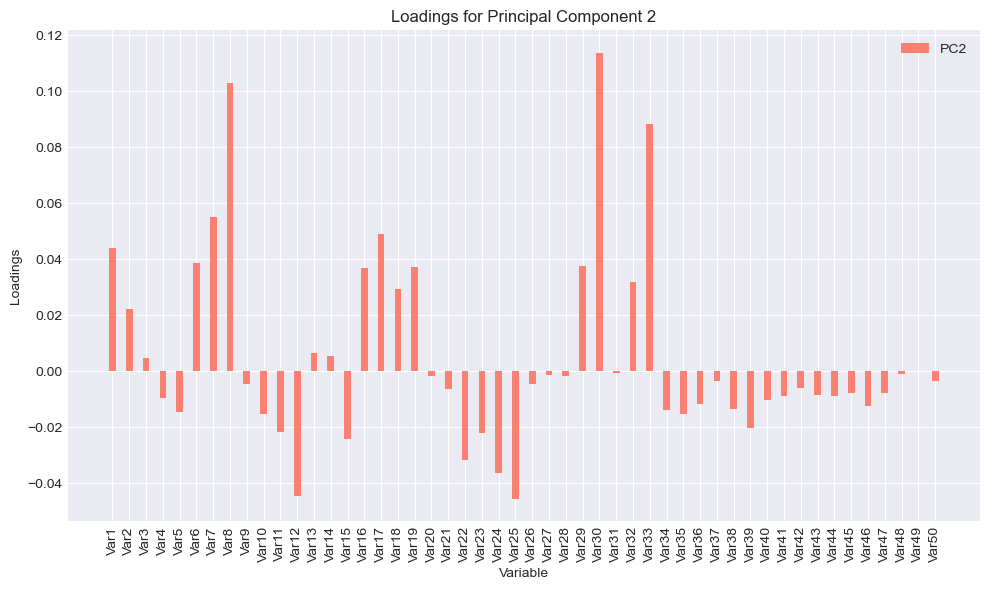

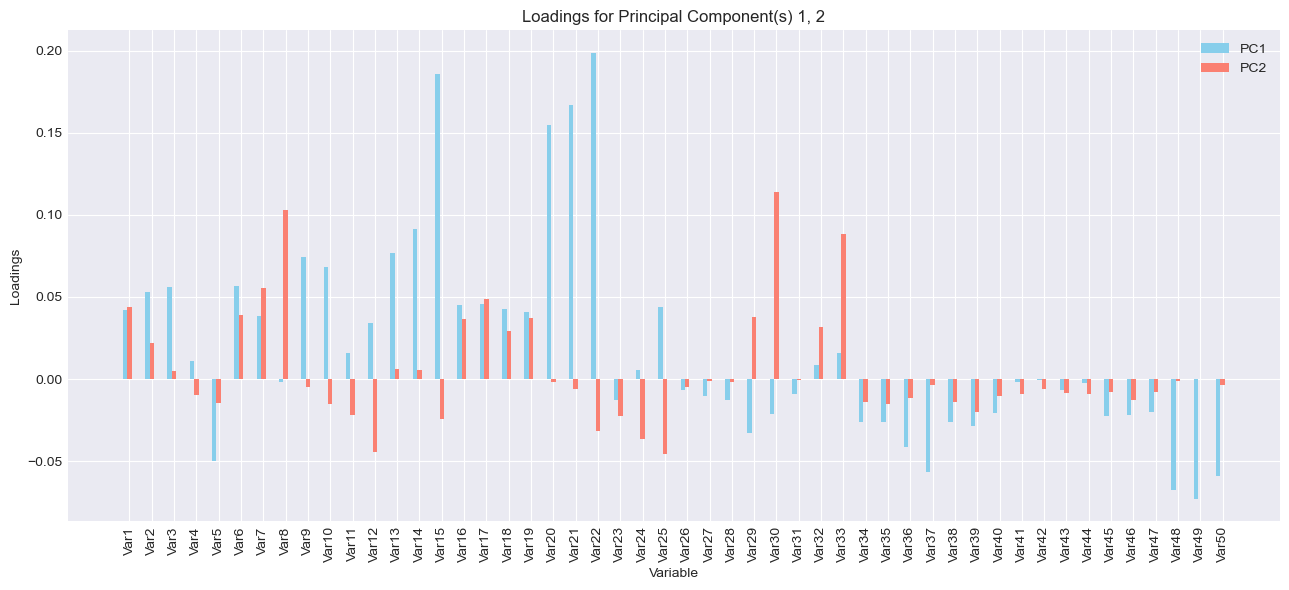

In [14]:
num_variables = dataset.shape[1]
bar_width = 0.4  # Width of the bars

# Plotting only the first two principal components
plot_pca_loadings(
    mixing_params=mixing_params,
    dataset=dataset,
    bar_width=0.4,
    colors=['skyblue', 'salmon'],  
    component_indices=[1, 2],      
    show_individual=True,
    show_combined=True,
    save_plots=False               
)

**Interpreting the Plot**
* Positive and Negative Contributions: Positive values imply a positive relationship with the principal component, while negative values indicate an inverse relationship. High absolute values mean the variable significantly impacts the component.
* Component Patterns: The way each variable loads on the components can show which features of the data structure or patterns are captured by each component.


## 5. Generative process - Projecting to latent space and back
The pose data can be mapped to the latent space spanned by the principal components (eigenvectors) by: 
$$\Phi^\top(x-\mu)$$
 where 

$$
{\Phi} = 
\begin{bmatrix}
    | & | & \cdots & | \\
    \Phi_1 & \Phi_2 & \cdots & \Phi_9 \\
    | & | & \cdots & |
\end{bmatrix}
$$
and $\Phi_i$ are the eigenvectors.
The following steps will implement this process. 

---
**Task 12 (easy): Project to subspace👩‍💻**
Run the cell below to center the data. Use the centered data to:
1. Project the original data onto the selected eigenvectors using $\Phi^\top(x-\mu)$. 

2. To plot the projected data.



---

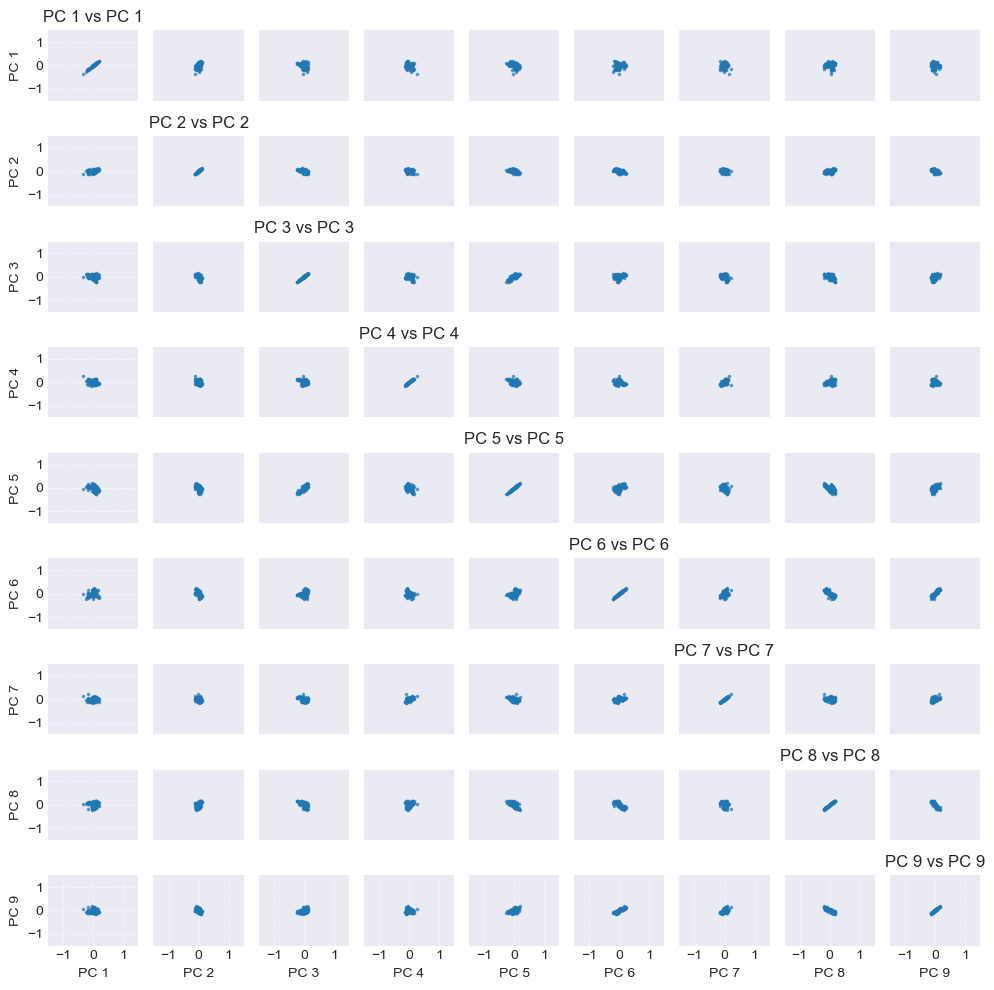

Projected data shape: (9, 100)


In [15]:
# Calculate the mean vector
mean_vector = np.mean(dataset, axis=0)

# Subtract the mean from each data point
centered_data = dataset - mean_vector

# Project the data onto the selected eigenvectors
phi = sorted_eigenvectors[:, :9]  # Select the first 9 eigenvectors for projection
projected_data = phi.T @ centered_data.T 
projected_data = projected_data.T 

# Plot the original dataset instead of the projected data
plot_pca_pairwise_scatter(
    dataset=dataset,  # Use original dataset with 50 features for plotting
    phi=phi,
    num_components=9,                
    figsize=(10, 10),
    marker='.',
    xlim=(-1.5, 1.5),
    ylim=(-1.5, 1.5),
    save_plot=False,                  
    save_dir='plots',                 
    file_format='png'                 
)

# Print the shape of the transposed projected data for verification
print("Projected data shape:", projected_data.T.shape)



---
**Task 13 (easy): Re-project from latent space to original data space👩‍💻**
1. Project the data from latent space to the original data space using $\Phi^\top x + \mu$.


---

In [16]:
# Write your solution here

# Re-project from latent space to original data space
reconstructed_data = (phi @ projected_data.T).T + mean_vector  # Shape should be (number_of_samples, original_dimensions)

# Print the shape of the reconstructed data for verification
print("Reconstructed data shape:", reconstructed_data.shape)


Reconstructed data shape: (100, 50)



---
**Task 14 (medium): Plotting original and reconstructed data👩‍💻**
1. Run the cell below to plot the first `nr_of_frames`
 from the original and the reconstructed data. 


---

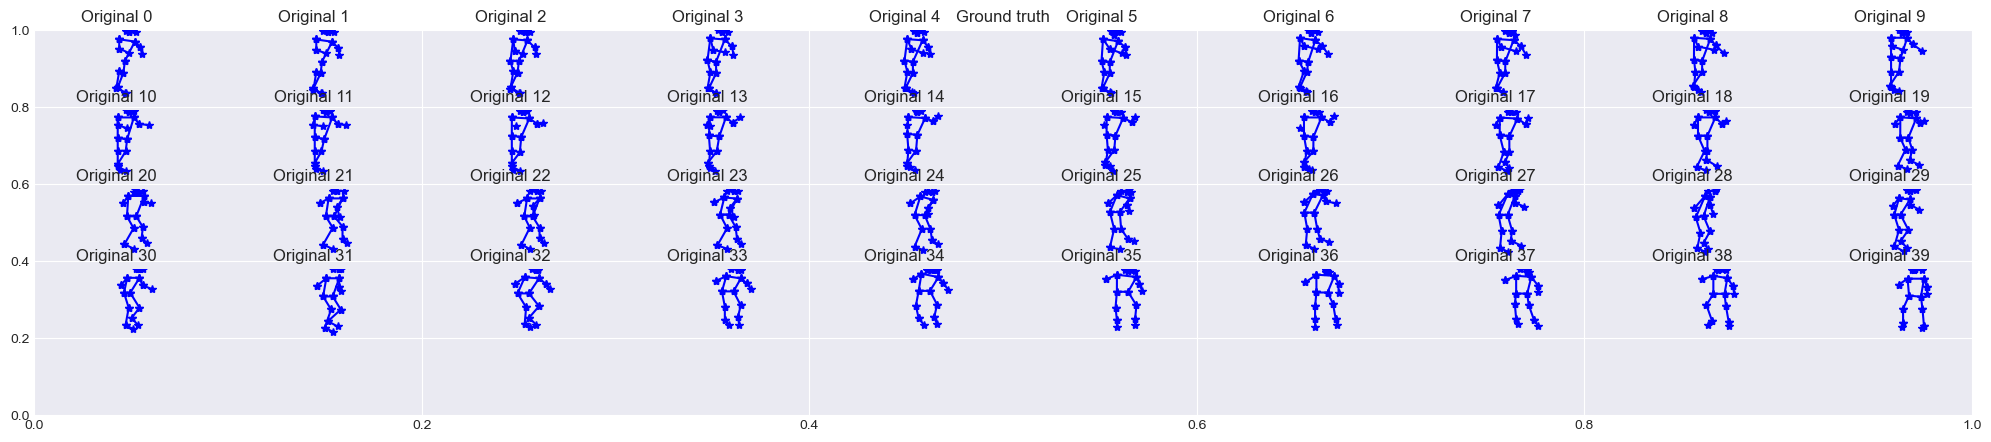

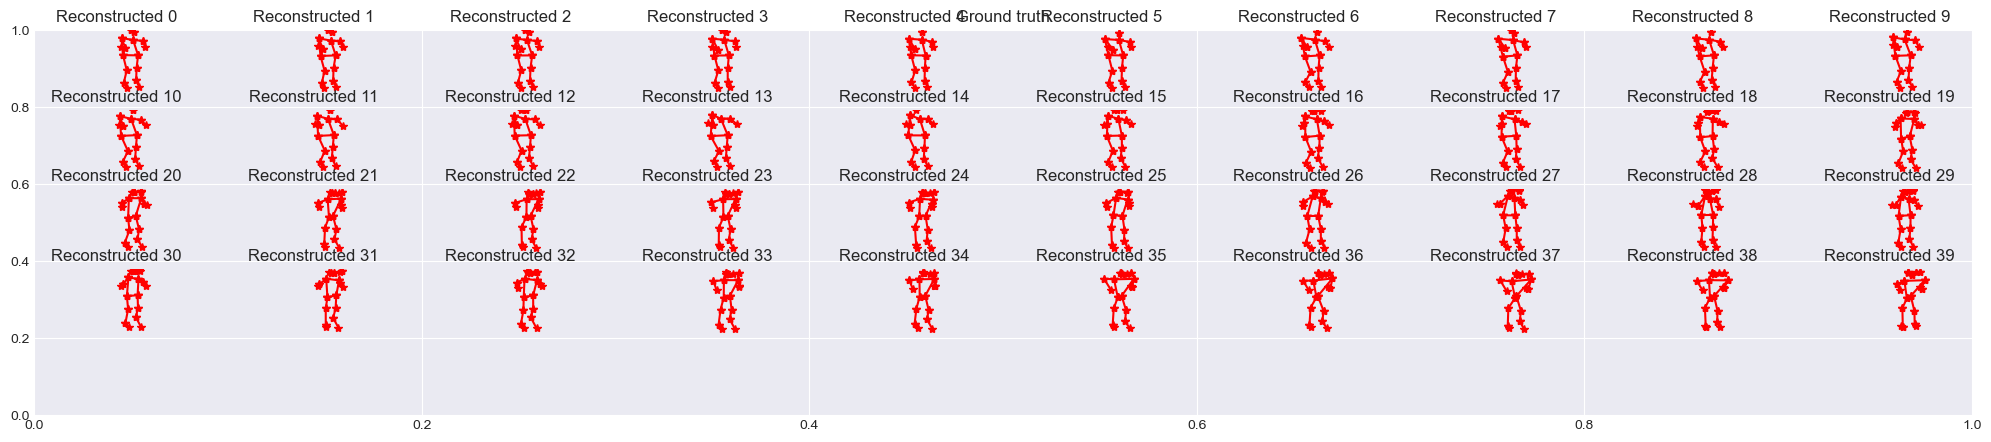

In [17]:
# Define the new shape you want (40, 50)
nr_of_frames = 40
new_shape = (nr_of_frames, 50)

# Reshape the array to the new shape
reshaped_data2 = np.empty(new_shape)
reshaped_data3 = np.empty(new_shape)

# Select the first `nr_of_frames` frames from the original and reconstructed data
reshaped_data2[:] = dataset[:new_shape[0], :]  # Original data
reshaped_data3[:] = reconstructed_data[:new_shape[0], :]  # Reconstructed data

# Plot the original data sequence
plot_single_sequence(reshaped_data2, pose_name='Original', color='blue')

# Plot the reconstructed data sequence
plot_single_sequence(reshaped_data3, pose_name='Reconstructed', color='red')



---
**Task 15 (easy): Plotting original and reconstructed data👩‍💻**
1. Use the function below to rerun the analysis. Change the number of components $k = 1,2,4,40 $.


---

Reconstruction with k = 1


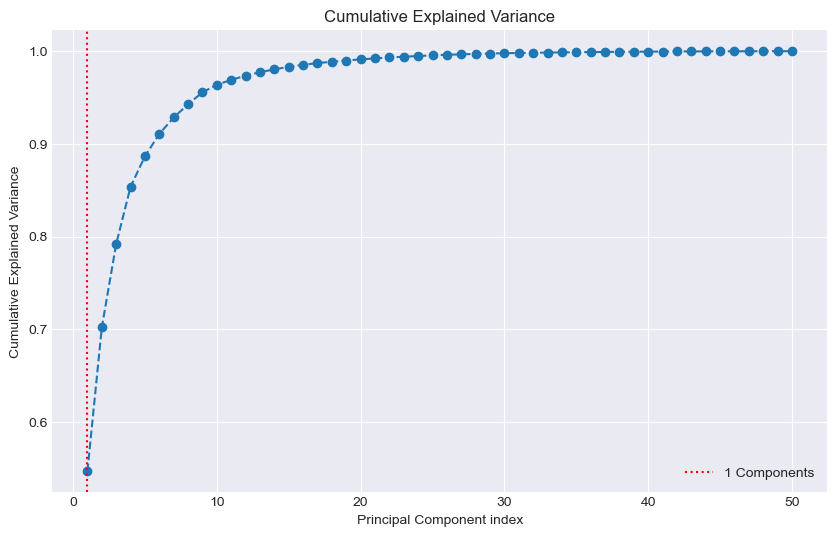

Number of Components (k): 1
Variance Explained by 1 components: 54.69%


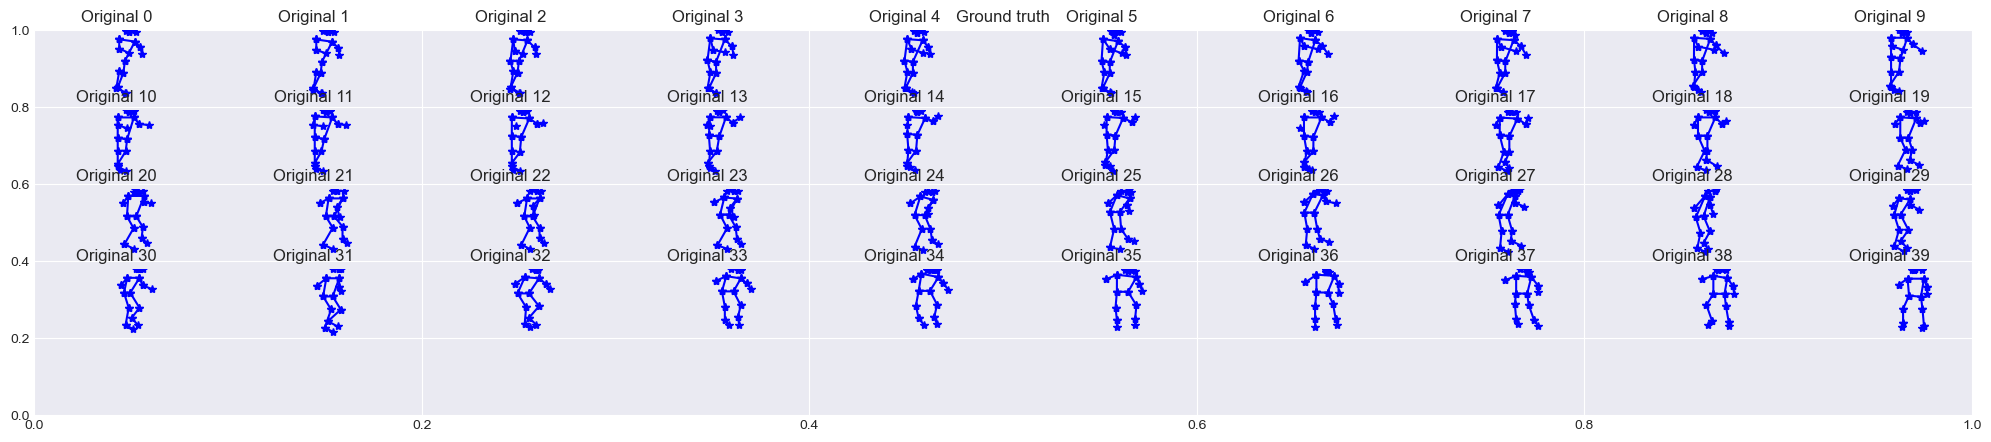

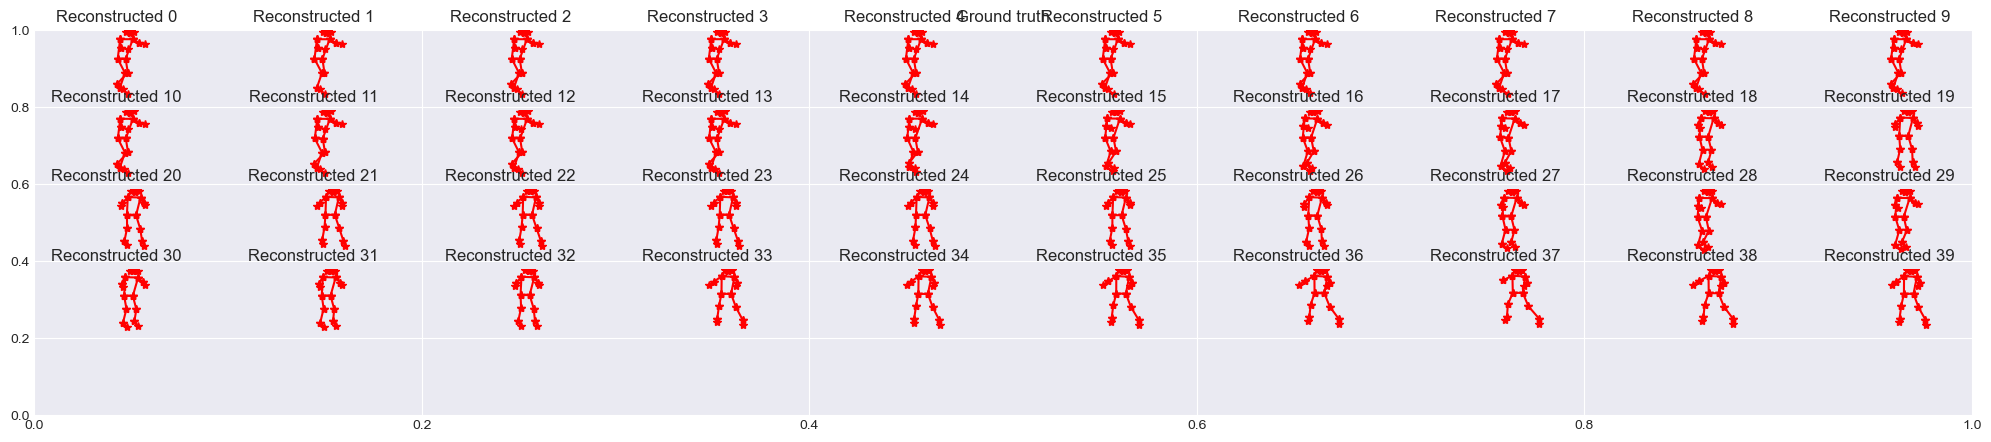

Reconstruction with k = 2


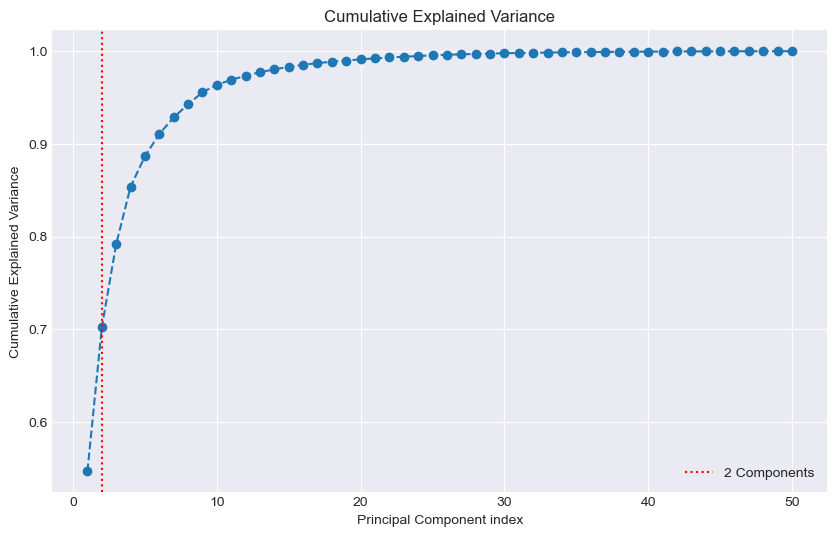

Number of Components (k): 2
Variance Explained by 2 components: 70.19%


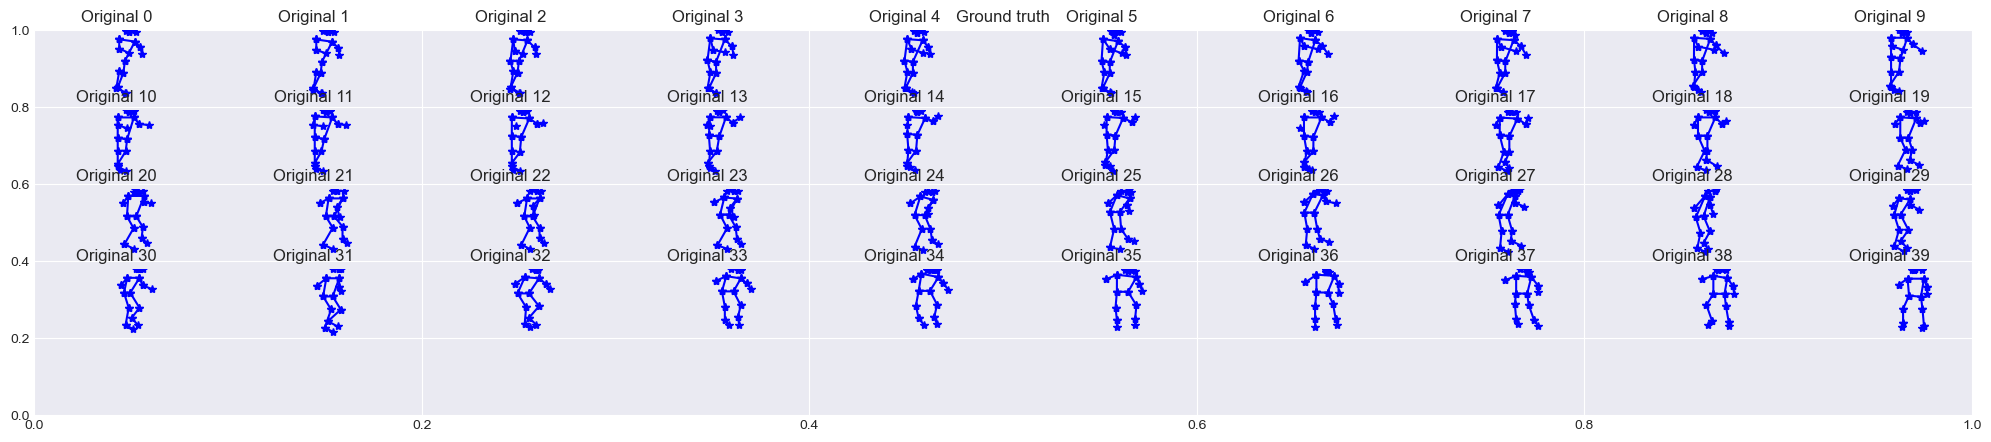

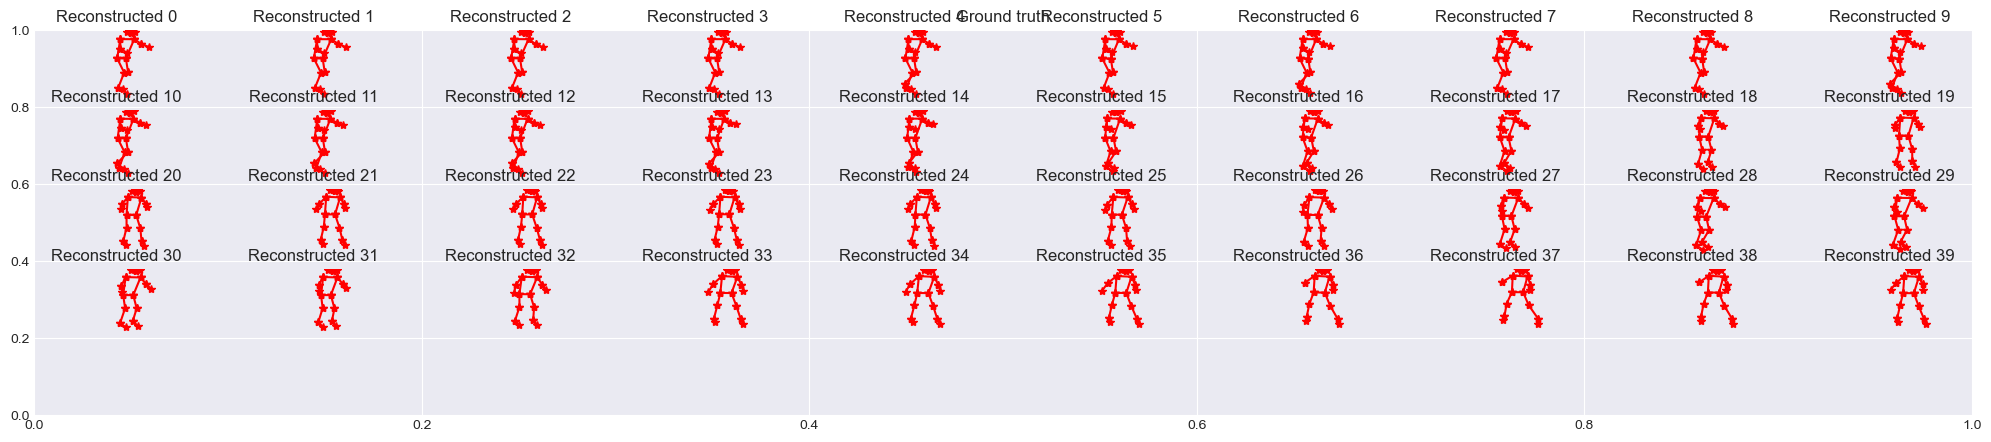

Reconstruction with k = 4


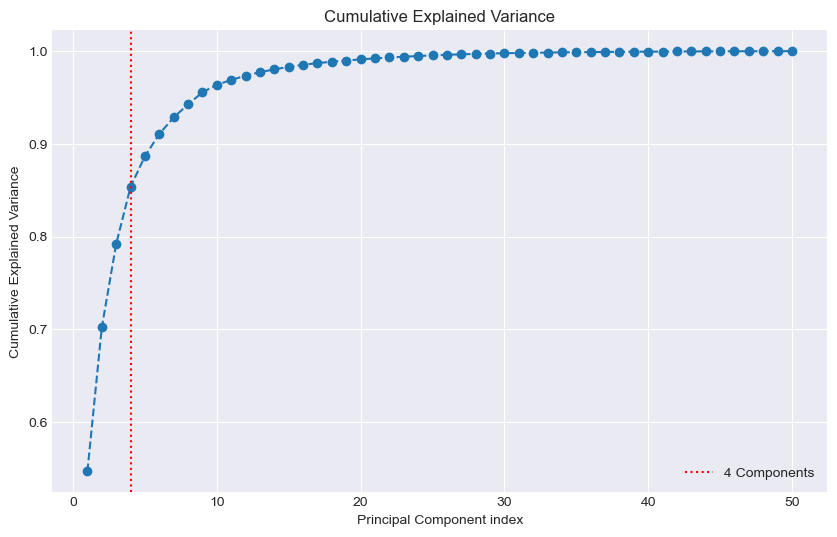

Number of Components (k): 4
Variance Explained by 4 components: 85.37%


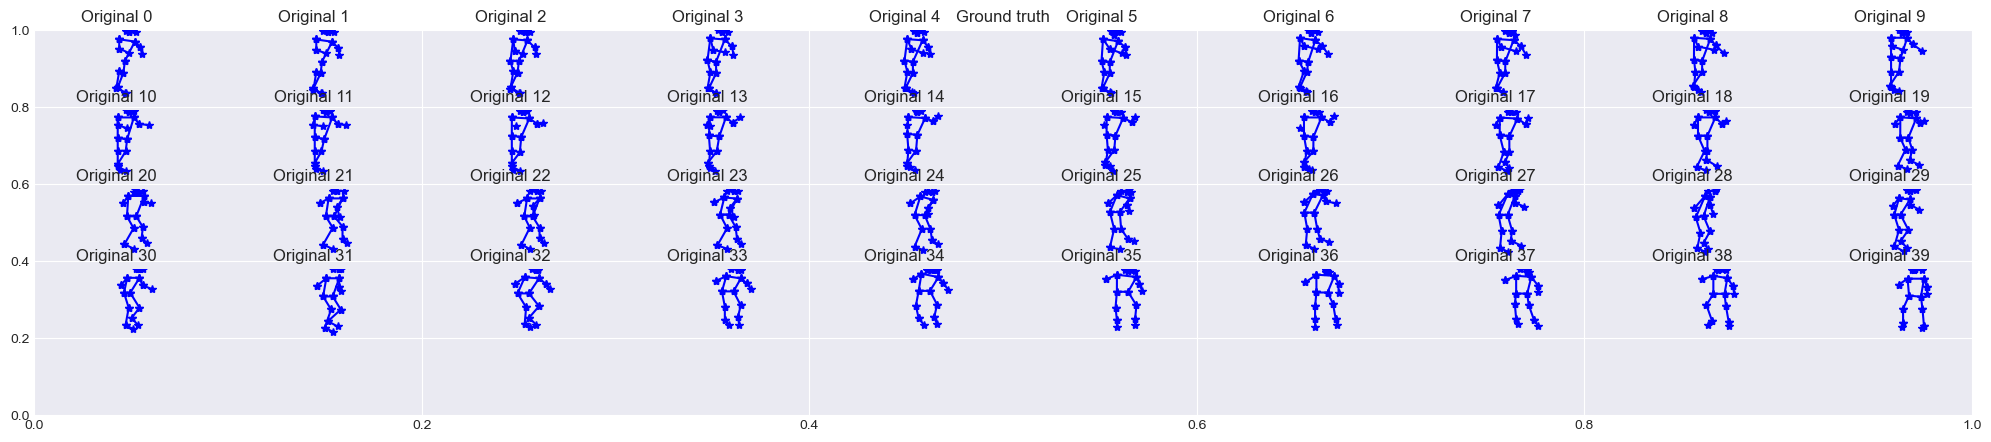

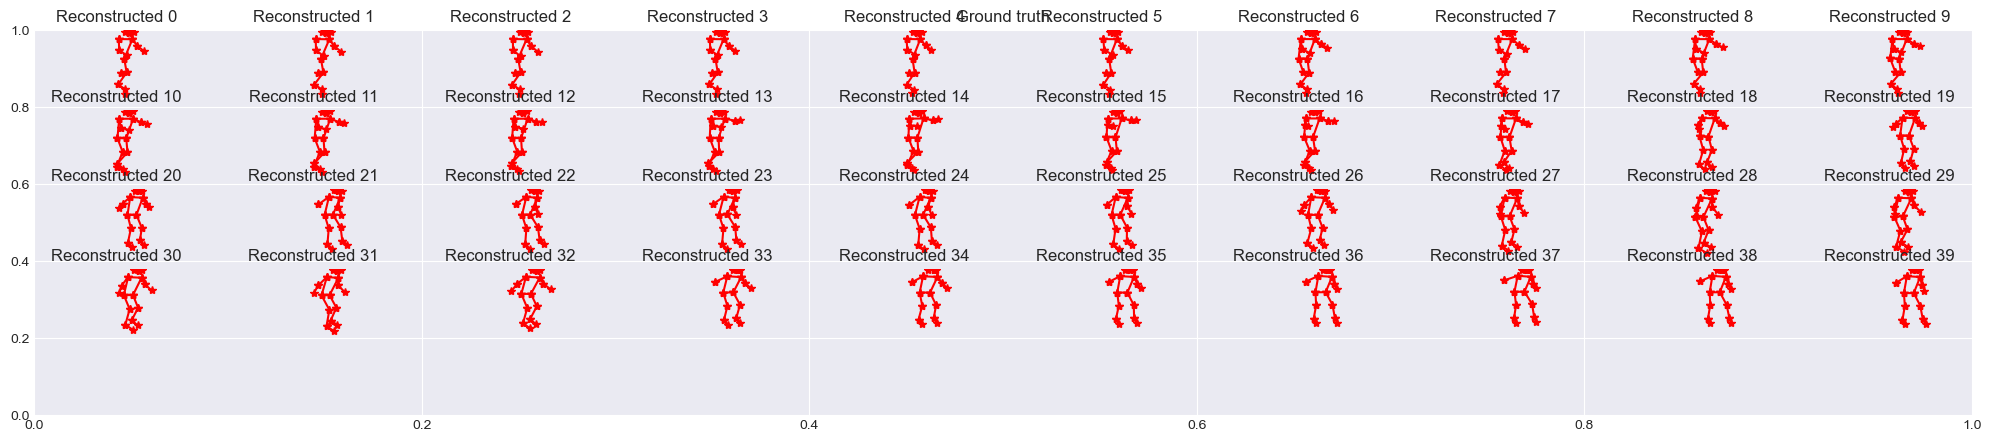

Reconstruction with k = 40


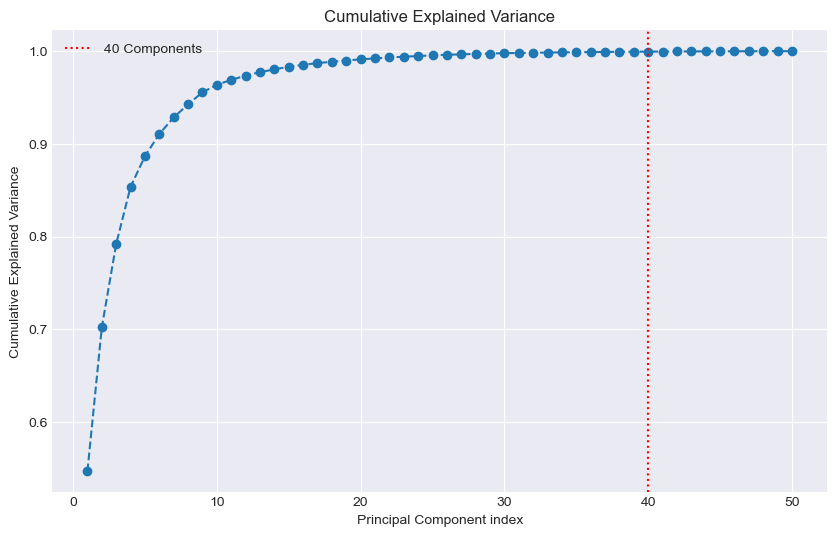

Number of Components (k): 40
Variance Explained by 40 components: 99.95%


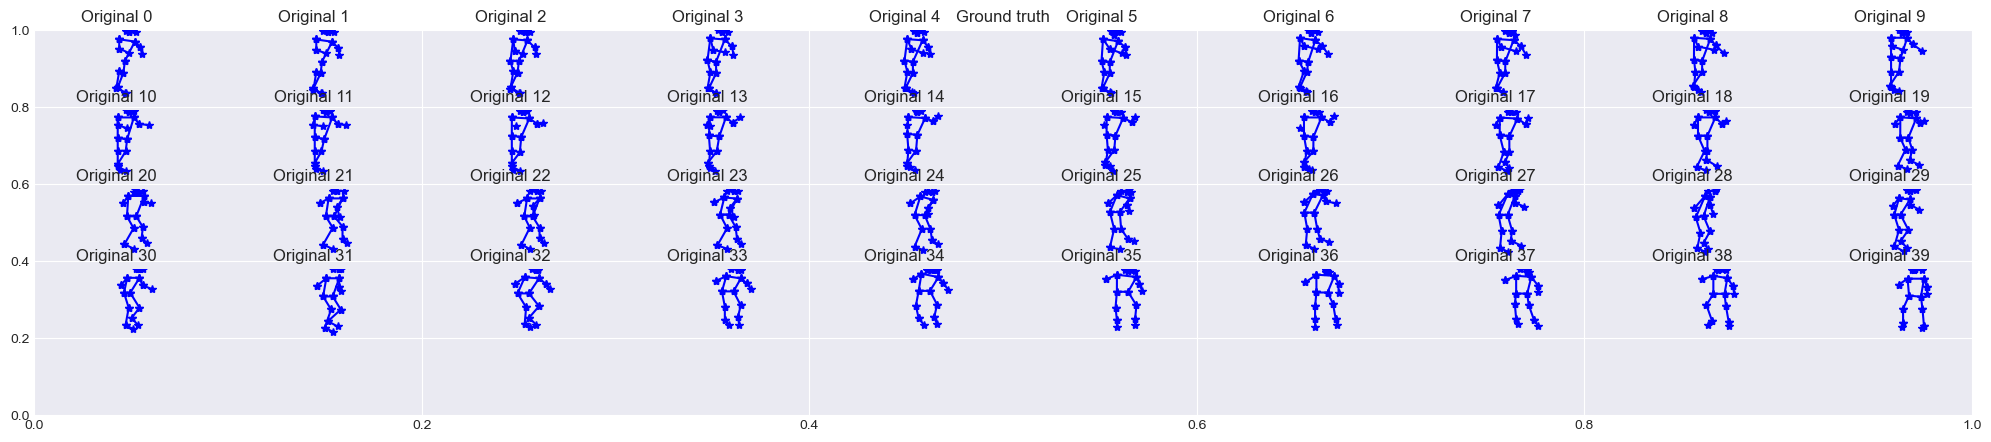

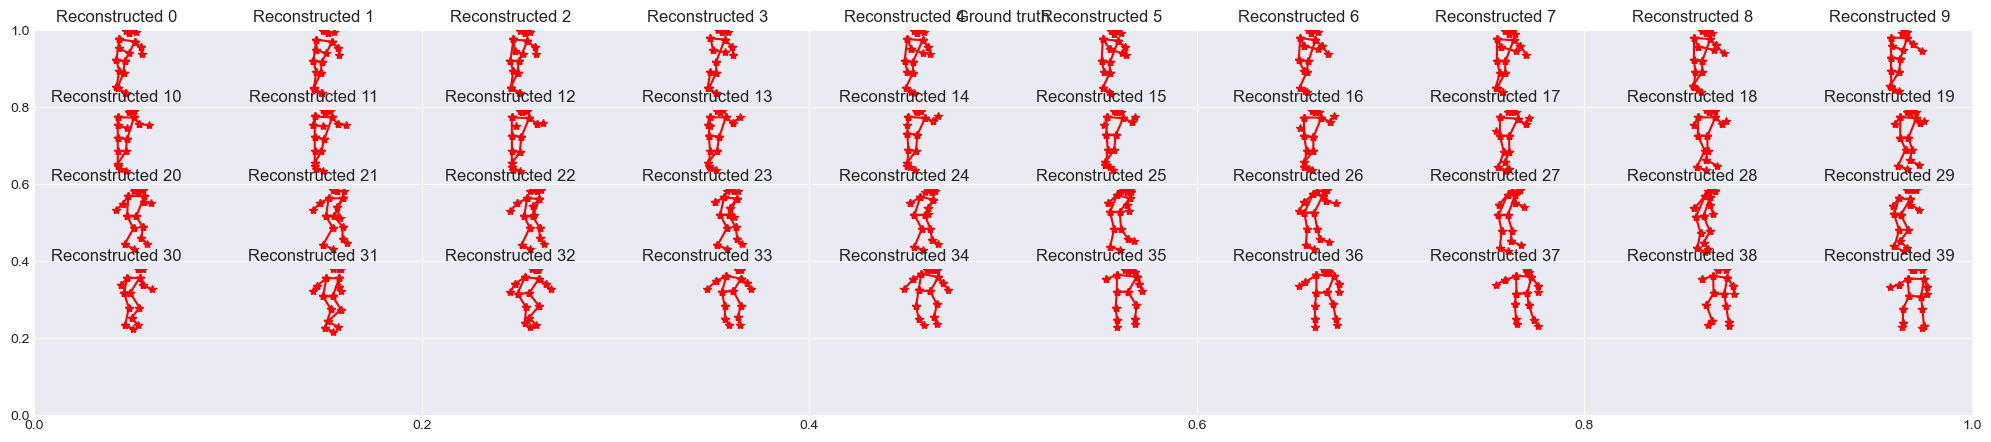

In [18]:
# Rerun the analysis with different values of k
for k in [1, 2, 4, 40]:
    print(f"Reconstruction with k = {k}")
    pca_reconstruction(dataset=dataset, k=k, num_frames=40)
